In [ ]:
##GAN

In [1]:
import torch
import pandas as pd
import numpy as np
from torch import nn, optim
from torch.autograd.variable import Variable
from torchvision import transforms, datasets
from data_treatment import DataSet, DataAtts
from discriminator import *
from generator import *
import ipywidgets as widgets
from IPython.display import display, Image
import matplotlib.pyplot as plt
import glob

import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
#from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import Imputer
from sklearn.tree import export_graphviz
import pydotplus
#from IPython.display import Image

In [2]:
SEED = 0
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
np.random.seed(SEED)

Load data

In [3]:
#load data
files_dropdown = widgets.Dropdown(
    options=glob.glob("original_data/*.csv"),
    description='File:',
    value = 'original_data/creditcard_1s_escalonated.csv',
    disabled=False,
)
display(files_dropdown)

Dropdown(description='File:', index=5, options=('original_data/creditcard_1s_escalonated1.csv', 'original_data…

In [4]:
file_name=files_dropdown.value
dataAtts = DataAtts(file_name)

In [31]:
database = DataSet (csv_file=file_name, root_dir=".")
data_loader = torch.utils.data.DataLoader(database, batch_size=batch_size, shuffle=True)
num_batches = len(data_loader)

Define model

In [5]:
# Noise
def noise(size):
    n = Variable(torch.randn(size, 64))
    if torch.cuda.is_available(): 
        return n.cuda() 
    return n

In [6]:
def train_generator(optimizer, fake_data):
    # Reset gradients
    optimizer.zero_grad()
    # Sample noise and generate fake data
    prediction = discriminator(fake_data)
    # backpropagate
    error = loss(prediction, real_data_target(prediction.size(0)))
    error.backward()
    # Update weights with gradients
    optimizer.step()
    return error

def train_discriminator(optimizer, real_data, fake_data):
    # Reset gradients
    optimizer.zero_grad()  
    
    # 1.1 Train on Real Data
    prediction_real = discriminator(real_data)
    # backpropagate
    error_real = loss(prediction_real, real_data_target(real_data.size(0)))
    error_real.backward()

    # 1.2 Train on Fake Data
    prediction_fake = discriminator(fake_data)
    #backpropagate
    error_fake = loss(prediction_fake, fake_data_target(real_data.size(0)))
    error_fake.backward()
    
    # 1.3 Update weights with gradients
    optimizer.step()
    
    # Return error
    return error_real + error_fake, prediction_real, prediction_fake

In [7]:
def real_data_target(size):
    '''
    Tensor containing ones, with shape = size
    '''
    data = Variable(torch.ones(size, 1))
    if torch.cuda.is_available(): return data.cuda()
    return data

def fake_data_target(size):
    '''
    Tensor containing zeros, with shape = size
    '''
    data = Variable(torch.zeros(size, 1))
    if torch.cuda.is_available(): return data.cuda()
    return data

In [8]:
lr = 0.0005
#lr= 0.0002
batch_size = 5
loss = nn.BCELoss()
#clamp_num=0.08
d_steps=2 ##只能由d-step控制g-step，batch=27，则d-step=5，就27//5=5为d-step，则d训练27次，g训练5次
g_steps=1
current_d_step=1
current_g_step=1
num_epochs=500

In [9]:
discriminator = DiscriminatorNet(29)
generator = GeneratorNet(29)
if torch.cuda.is_available():
    discriminator.cuda()
    generator.cuda()
#d_optimizer = optim.Adam(discriminator.parameters(), lr=lr)
#g_optimizer = optim.Adam(generator.parameters(), lr=lr)

/anaconda3/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


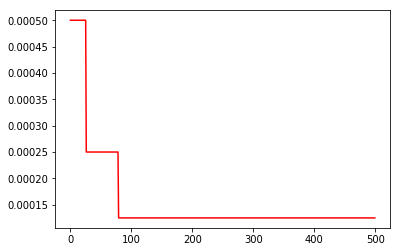

In [10]:
#lr decay
from torch.optim import lr_scheduler

lr_list_d = []
lr_list_g = []

d_optimizer = optim.Adam(discriminator.parameters(), lr=lr)
g_optimizer = optim.Adam(generator.parameters(), lr=lr)

scheduler_d = lr_scheduler.MultiStepLR(d_optimizer,milestones=[27,80],gamma = 0.5) #500 epoch
scheduler_g = lr_scheduler.MultiStepLR(g_optimizer,milestones=[27,80],gamma = 0.5)

for epoch in range(500):
    scheduler_d.step()
    scheduler_g.step()
    lr_list_d.append(d_optimizer.state_dict()['param_groups'][0]['lr'])
    lr_list_g.append(g_optimizer.state_dict()['param_groups'][0]['lr'])
plt.plot(range(500),lr_list_d,color = 'r')

Train model

Epoch 0
Epoch  0


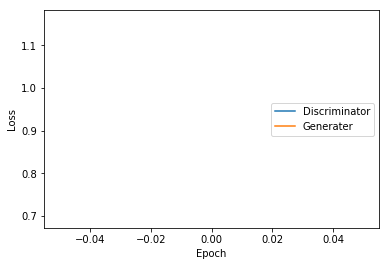

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch  50


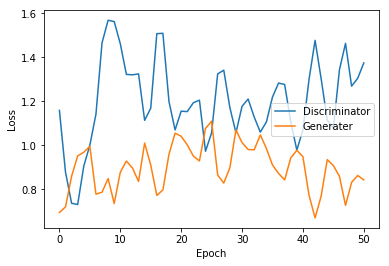

Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99
Epoch 100
Epoch  100


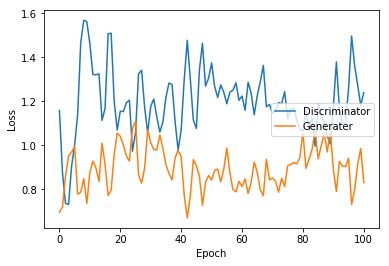

Epoch 101
Epoch 102
Epoch 103
Epoch 104
Epoch 105
Epoch 106
Epoch 107
Epoch 108
Epoch 109
Epoch 110
Epoch 111
Epoch 112
Epoch 113
Epoch 114
Epoch 115
Epoch 116
Epoch 117
Epoch 118
Epoch 119
Epoch 120
Epoch 121
Epoch 122
Epoch 123
Epoch 124
Epoch 125
Epoch 126
Epoch 127
Epoch 128
Epoch 129
Epoch 130
Epoch 131
Epoch 132
Epoch 133
Epoch 134
Epoch 135
Epoch 136
Epoch 137
Epoch 138
Epoch 139
Epoch 140
Epoch 141
Epoch 142
Epoch 143
Epoch 144
Epoch 145
Epoch 146
Epoch 147
Epoch 148
Epoch 149
Epoch 150
Epoch  150


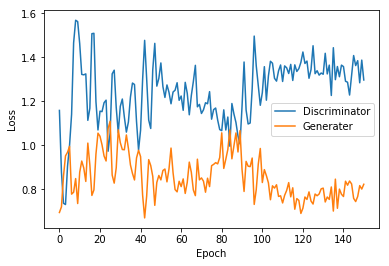

Epoch 151
Epoch 152
Epoch 153
Epoch 154
Epoch 155
Epoch 156
Epoch 157
Epoch 158
Epoch 159
Epoch 160
Epoch 161
Epoch 162
Epoch 163
Epoch 164
Epoch 165
Epoch 166
Epoch 167
Epoch 168
Epoch 169
Epoch 170
Epoch 171
Epoch 172
Epoch 173
Epoch 174
Epoch 175
Epoch 176
Epoch 177
Epoch 178
Epoch 179
Epoch 180
Epoch 181
Epoch 182
Epoch 183
Epoch 184
Epoch 185
Epoch 186
Epoch 187
Epoch 188
Epoch 189
Epoch 190
Epoch 191
Epoch 192
Epoch 193
Epoch 194
Epoch 195
Epoch 196
Epoch 197
Epoch 198
Epoch 199
Epoch 200
Epoch  200


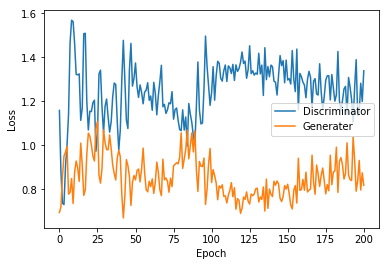

Epoch 201
Epoch 202
Epoch 203
Epoch 204
Epoch 205
Epoch 206
Epoch 207
Epoch 208
Epoch 209
Epoch 210
Epoch 211
Epoch 212
Epoch 213
Epoch 214
Epoch 215
Epoch 216
Epoch 217
Epoch 218
Epoch 219
Epoch 220
Epoch 221
Epoch 222
Epoch 223
Epoch 224
Epoch 225
Epoch 226
Epoch 227
Epoch 228
Epoch 229
Epoch 230
Epoch 231
Epoch 232
Epoch 233
Epoch 234
Epoch 235
Epoch 236
Epoch 237
Epoch 238
Epoch 239
Epoch 240
Epoch 241
Epoch 242
Epoch 243
Epoch 244
Epoch 245
Epoch 246
Epoch 247
Epoch 248
Epoch 249
Epoch 250
Epoch  250


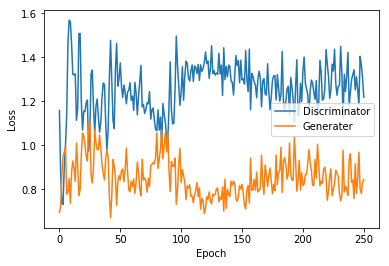

Epoch 251
Epoch 252
Epoch 253
Epoch 254
Epoch 255
Epoch 256
Epoch 257
Epoch 258
Epoch 259
Epoch 260
Epoch 261
Epoch 262
Epoch 263
Epoch 264
Epoch 265
Epoch 266
Epoch 267
Epoch 268
Epoch 269
Epoch 270
Epoch 271
Epoch 272
Epoch 273
Epoch 274
Epoch 275
Epoch 276
Epoch 277
Epoch 278
Epoch 279
Epoch 280
Epoch 281
Epoch 282
Epoch 283
Epoch 284
Epoch 285
Epoch 286
Epoch 287
Epoch 288
Epoch 289
Epoch 290
Epoch 291
Epoch 292
Epoch 293
Epoch 294
Epoch 295
Epoch 296
Epoch 297
Epoch 298
Epoch 299
Epoch 300
Epoch  300


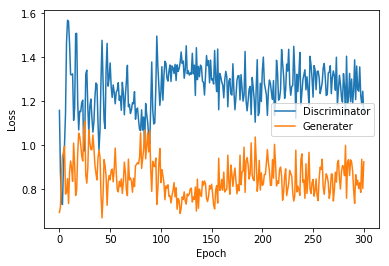

Epoch 301
Epoch 302
Epoch 303
Epoch 304
Epoch 305
Epoch 306
Epoch 307
Epoch 308
Epoch 309
Epoch 310
Epoch 311
Epoch 312
Epoch 313
Epoch 314
Epoch 315
Epoch 316
Epoch 317
Epoch 318
Epoch 319
Epoch 320
Epoch 321
Epoch 322
Epoch 323
Epoch 324
Epoch 325
Epoch 326
Epoch 327
Epoch 328
Epoch 329
Epoch 330
Epoch 331
Epoch 332
Epoch 333
Epoch 334
Epoch 335
Epoch 336
Epoch 337
Epoch 338
Epoch 339
Epoch 340
Epoch 341
Epoch 342
Epoch 343
Epoch 344
Epoch 345
Epoch 346
Epoch 347
Epoch 348
Epoch 349
Epoch 350
Epoch  350


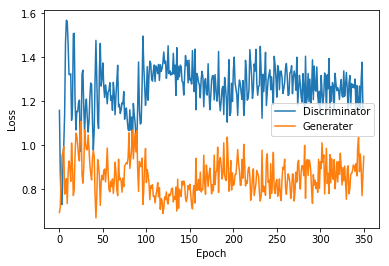

Epoch 351
Epoch 352
Epoch 353
Epoch 354
Epoch 355
Epoch 356
Epoch 357
Epoch 358
Epoch 359
Epoch 360
Epoch 361
Epoch 362
Epoch 363
Epoch 364
Epoch 365
Epoch 366
Epoch 367
Epoch 368
Epoch 369
Epoch 370
Epoch 371
Epoch 372
Epoch 373
Epoch 374
Epoch 375
Epoch 376
Epoch 377
Epoch 378
Epoch 379
Epoch 380
Epoch 381
Epoch 382
Epoch 383
Epoch 384
Epoch 385
Epoch 386
Epoch 387
Epoch 388
Epoch 389
Epoch 390
Epoch 391
Epoch 392
Epoch 393
Epoch 394
Epoch 395
Epoch 396
Epoch 397
Epoch 398
Epoch 399
Epoch 400
Epoch  400


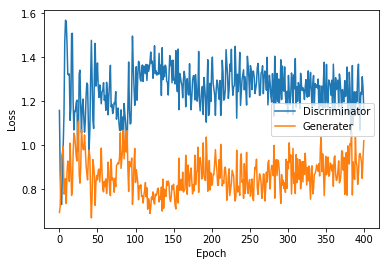

Epoch 401
Epoch 402
Epoch 403
Epoch 404
Epoch 405
Epoch 406
Epoch 407
Epoch 408
Epoch 409
Epoch 410
Epoch 411
Epoch 412
Epoch 413
Epoch 414
Epoch 415
Epoch 416
Epoch 417
Epoch 418
Epoch 419
Epoch 420
Epoch 421
Epoch 422
Epoch 423
Epoch 424
Epoch 425
Epoch 426
Epoch 427
Epoch 428
Epoch 429
Epoch 430
Epoch 431
Epoch 432
Epoch 433
Epoch 434
Epoch 435
Epoch 436
Epoch 437
Epoch 438
Epoch 439
Epoch 440
Epoch 441
Epoch 442
Epoch 443
Epoch 444
Epoch 445
Epoch 446
Epoch 447
Epoch 448
Epoch 449
Epoch 450
Epoch  450


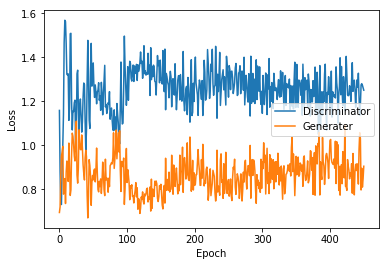

Epoch 451
Epoch 452
Epoch 453
Epoch 454
Epoch 455
Epoch 456
Epoch 457
Epoch 458
Epoch 459
Epoch 460
Epoch 461
Epoch 462
Epoch 463
Epoch 464
Epoch 465
Epoch 466
Epoch 467
Epoch 468
Epoch 469
Epoch 470
Epoch 471
Epoch 472
Epoch 473
Epoch 474
Epoch 475
Epoch 476
Epoch 477
Epoch 478
Epoch 479
Epoch 480
Epoch 481
Epoch 482
Epoch 483
Epoch 484
Epoch 485
Epoch 486
Epoch 487
Epoch 488
Epoch 489
Epoch 490
Epoch 491
Epoch 492
Epoch 493
Epoch 494
Epoch 495
Epoch 496
Epoch 497
Epoch 498
Epoch 499


In [12]:
d_loss_list=[] ###record loss
g_loss_list=[]

for epoch in range(num_epochs):
    print("Epoch", epoch)
    d_error_list=[]
    g_error_list=[]
    for n_batch, real_batch in enumerate(data_loader):
        # 1. Train Discriminator
        real_data = Variable(real_batch).float()
        if torch.cuda.is_available(): 
            real_data = real_data.cuda()
        # Generate fake data
        fake_data = generator(noise(real_data.size(0))).detach()
        # Train D
        d_error, d_pred_real, d_pred_fake = train_discriminator(d_optimizer,
                                                                real_data, fake_data)
        d_error_list.append(d_error.item())
        
        if current_d_step <= d_steps: #循环d_steps次
            current_d_step += 1
            continue #若次数< self.d_steps，后面所有都不执行，循环继续训练D。d_steps-1个batch训练D，
            #再一个batch训练D和g_steps个G
        else:
            current_d_step = 1
            
            
        # 2. Train Generator
        # Generate fake data
        fake_data = generator(noise(real_batch.size(0)))
        #generated_points.append(fake_data)
        # Train G
        g_error = train_generator(g_optimizer, fake_data)
        g_error_list.append(g_error.item())
        
        # Display Progress
    d_loss_list.append(np.mean(d_error_list))
    g_loss_list.append(np.mean(g_error_list))
    
    if epoch%50==0:
        print("Epoch ", epoch)
        plt.plot(d_loss_list)
        plt.plot(g_loss_list)
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Discriminator', 'Generater'], loc='center right')
        plt.show()


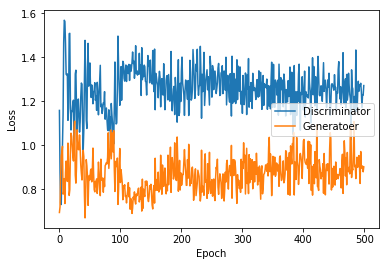

In [13]:
#final loss
plt.plot(d_loss_list)
plt.plot(g_loss_list)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'Generatoer'], loc='center right')
plt.show()

Compare real and fake distribution

In [14]:
train=pd.read_csv('original_data/creditcard_train_all.csv')
train=train.drop(['Unnamed: 0'], axis=1)
X_train=train.drop(['Class'], axis=1)
dis_real=train[train.Class==1]

In [15]:
dis_real.shape

(379, 30)

In [32]:
fake_data = generator(noise(379))
fake_data=torch.clamp(fake_data,min=0.0)
fake_data_da=pd.DataFrame(fake_data.detach().numpy(), columns=X_train.columns)

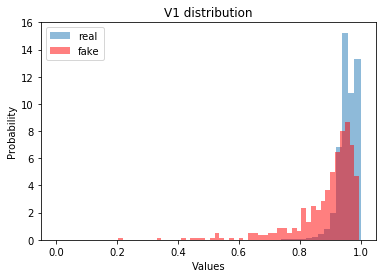

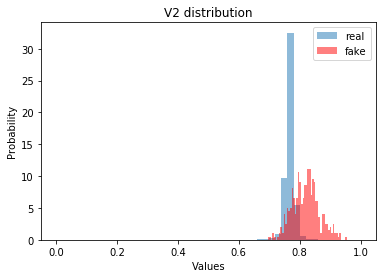

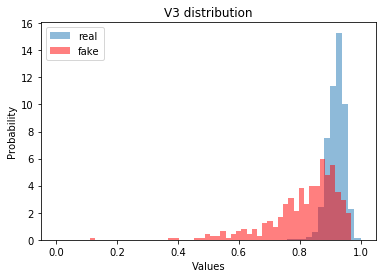

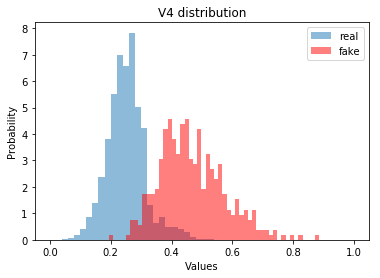

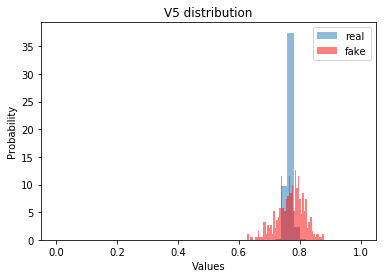

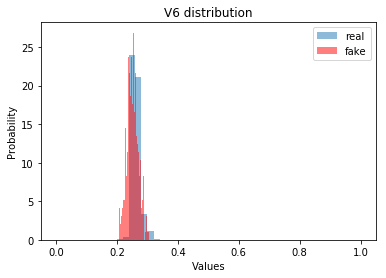

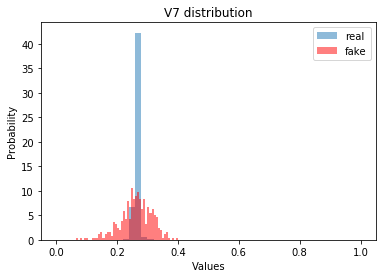

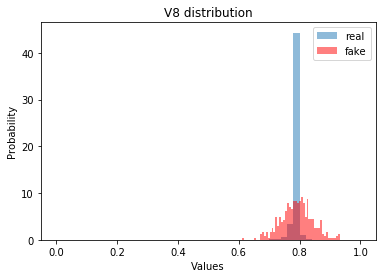

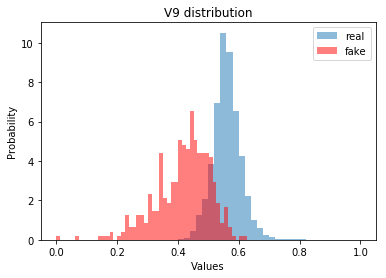

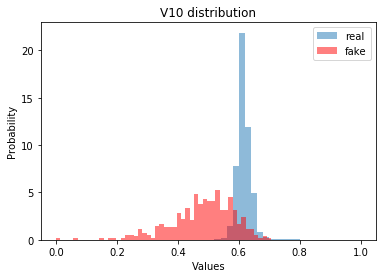

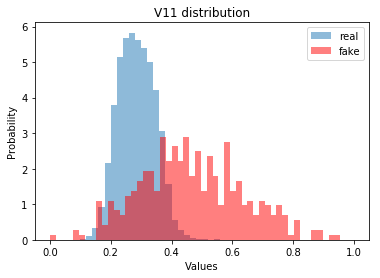

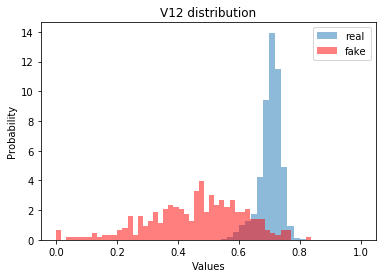

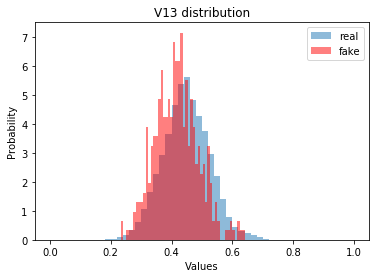

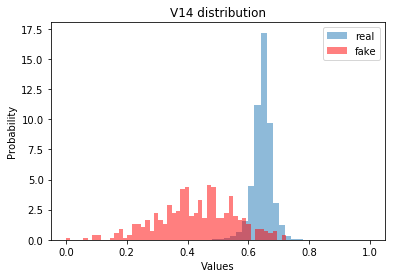

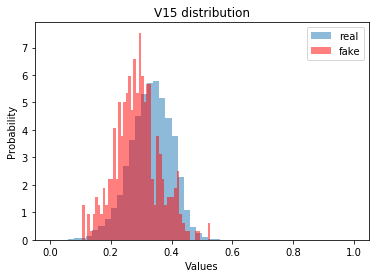

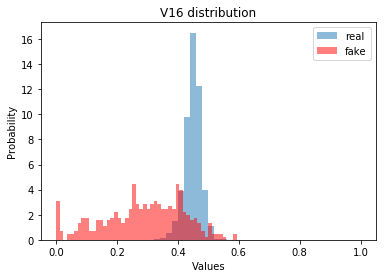

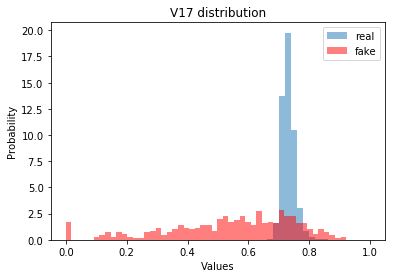

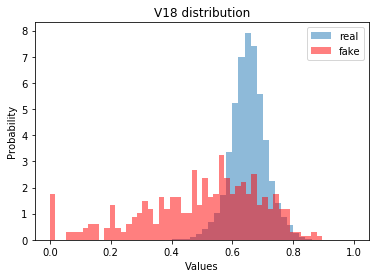

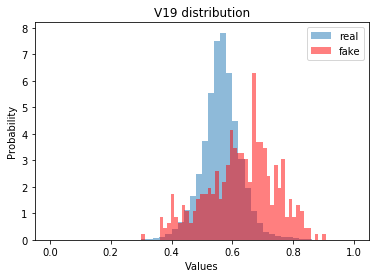

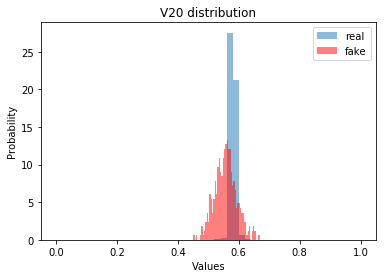

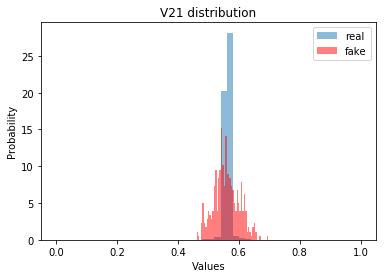

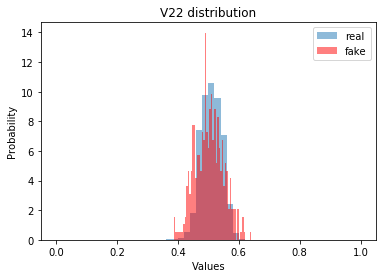

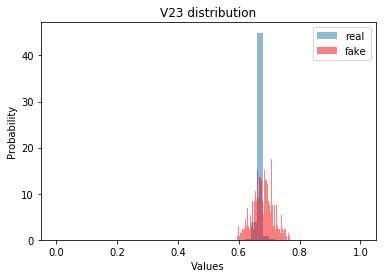

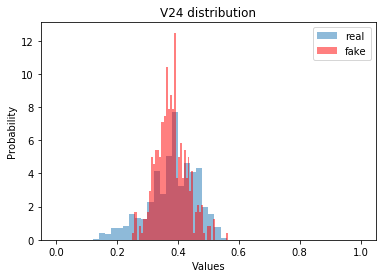

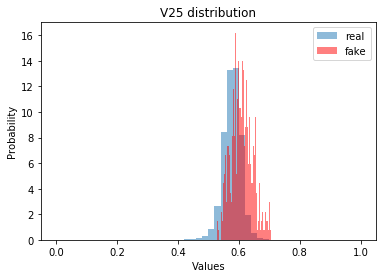

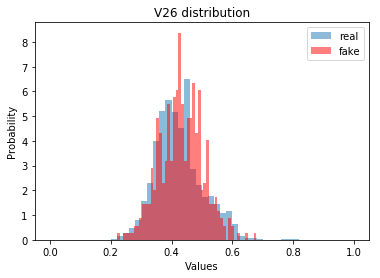

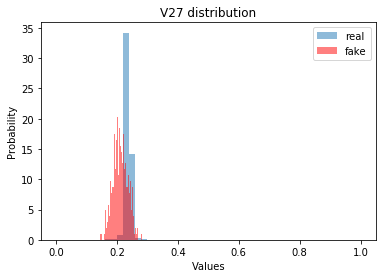

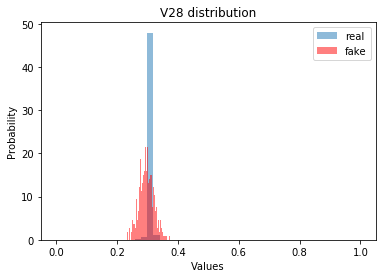

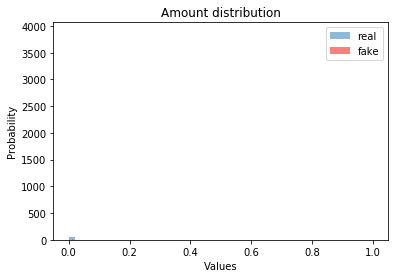

<Figure size 432x288 with 0 Axes>

In [37]:
for name in X_train.columns:       
    plt.xlabel('Values')
    plt.ylabel('Probability')
    plt.title(name + " distribution")
    real_dist = X_train[name].values
    fake_dist = fake_data_da[name].values
    plt.hist(real_dist, 50, density=True, alpha=0.5) #蓝 real
    plt.hist(fake_dist, 50, density=True, alpha=0.5, facecolor='r') #红fake
    plt.legend(["real","fake"])
    #plt.savefig('fake_data/'+ dataAtts.fname + "/"+name+'_distribution.png')
    plt.show()
    plt.clf()


DT Classification

In [18]:
train=pd.read_csv('original_data/creditcard_train_all.csv')
test=pd.read_csv('original_data/creditcard_test_all.csv')

In [19]:
train=train.drop(['Unnamed: 0'], axis=1)
test=test.drop(['Unnamed: 0'], axis=1)
X_train=train.drop(['Class'], axis=1)
y_train=train['Class']
X_test=test.drop(['Class'], axis=1)
y_test=test['Class']

In [21]:
y_train.value_counts()

0    213226
1       379
Name: Class, dtype: int64

In [1]:
379/213226

0.0017774567829439186

In [22]:
y_test.value_counts()

0    71089
1      113
Name: Class, dtype: int64

In [2]:
113/ 71089

0.0015895567528028246

In [23]:
# Decision Tree Model_original dataset
dtree = DecisionTreeClassifier(
    max_depth=5,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )

dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Original_Decision Tree Model---")
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
print(classification_report(y_test, dtree.predict(X_test)))

dt_roc_auc = roc_auc_score(y_test, dtree.predict_proba(X_test)[:,1])
print(dt_roc_auc)



 ---Decision Tree Model---
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71089
           1       0.05      0.88      0.09       113

    accuracy                           0.97     71202
   macro avg       0.52      0.93      0.54     71202
weighted avg       1.00      0.97      0.98     71202

0.9428488432236943


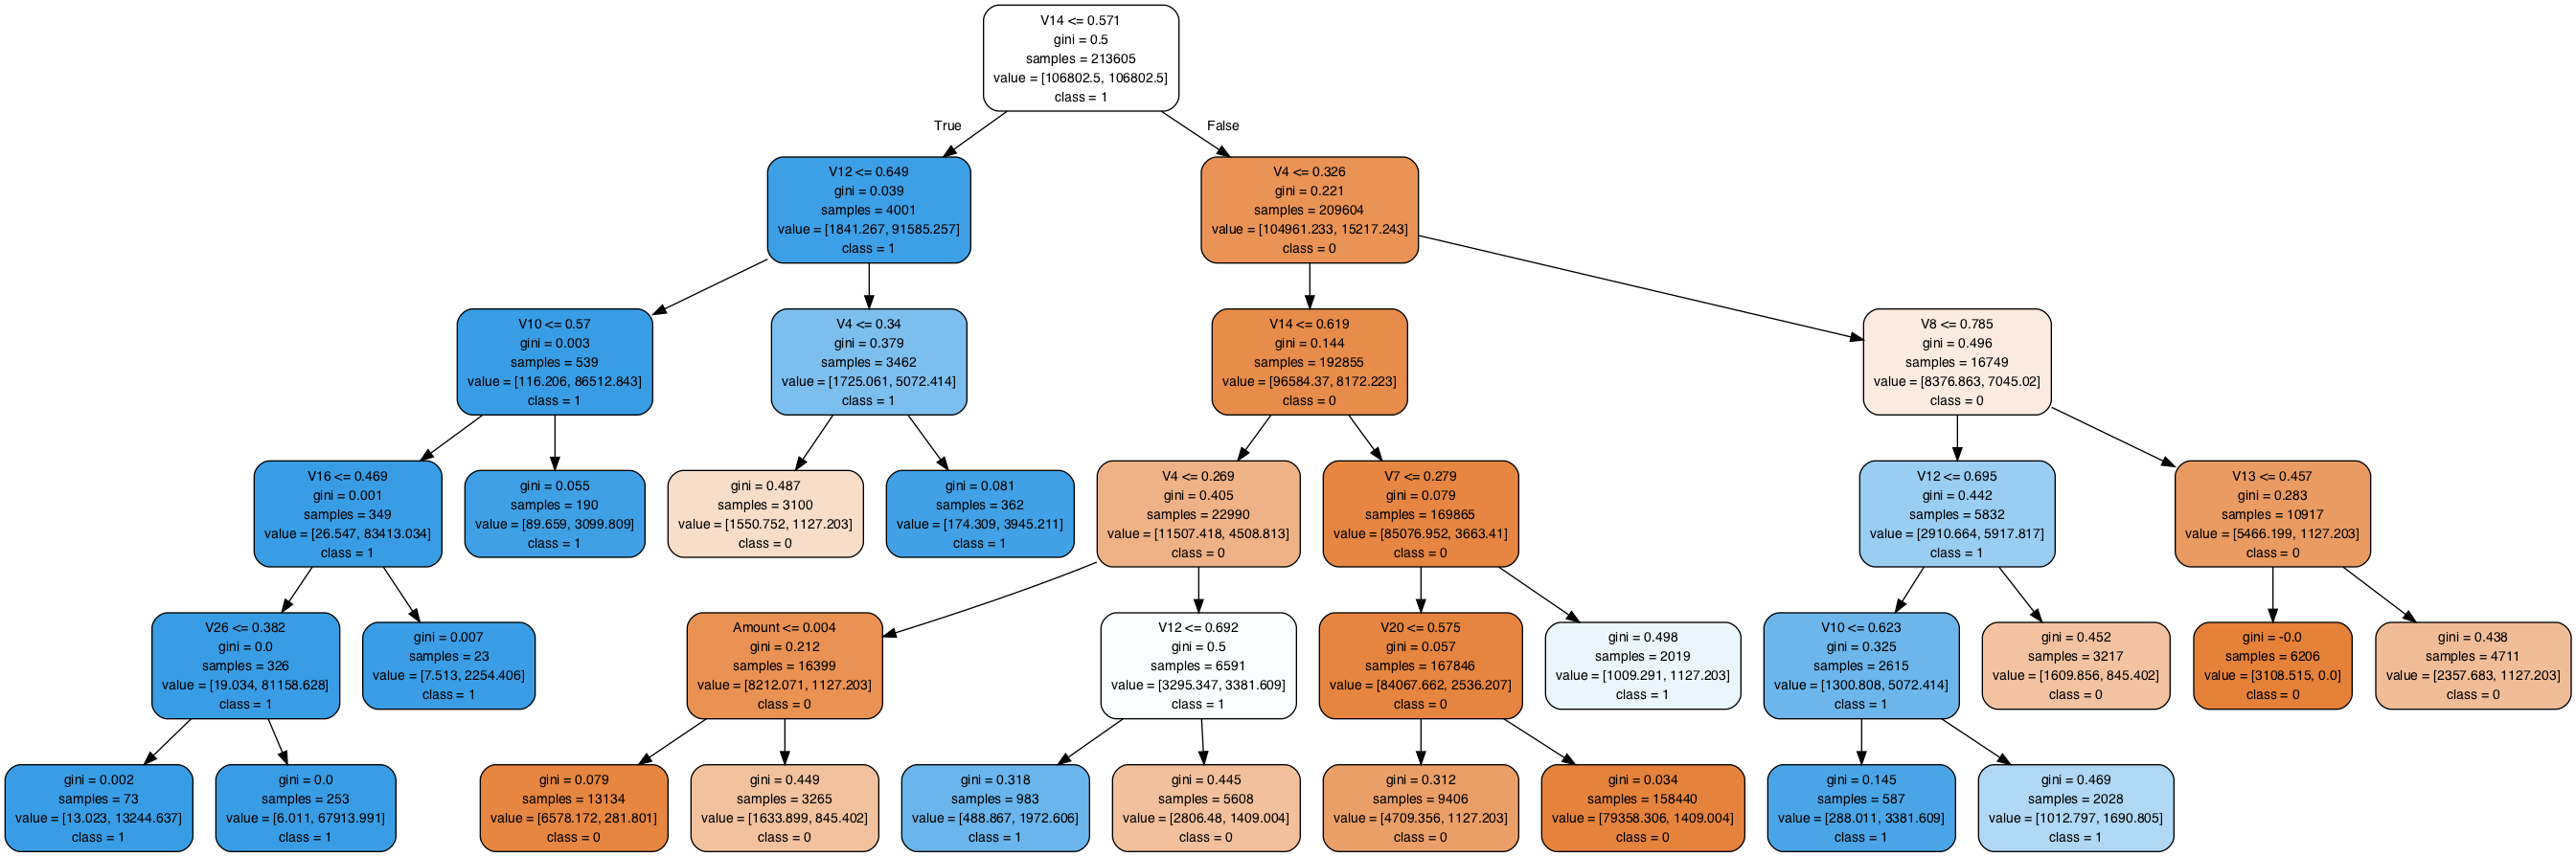

In [53]:
export_graphviz(dtree, out_file="models/tree.dot", feature_names=X_train.columns, class_names=["0","1"], filled=True, rounded=True)
g = pydotplus.graph_from_dot_file(path="models/tree.dot")
Image(g.create_png())

Create fake data

In [25]:
fake_data = generator(noise(7000)) ###imbalanced rate 0.177%->3.4%
fake_data_cla=torch.clamp(fake_data,min=0.0)

In [26]:
#X_train_all=pd.concat([X_train,  y_train], axis=1)
#train
fake_data_all=pd.DataFrame(fake_data_cla.detach().numpy(), columns=X_train.columns)
fake_data_all['Class']=1
train_fake=pd.concat([train,  fake_data_all], axis=0)
train_fake = sklearn.utils.shuffle(train_fake)
X_train_fake=train_fake.drop(['Class'], axis=1)
y_train_fake=train_fake['Class']

In [28]:
#synthetic data sets
# Decision Tree Model_add fake dataset
dtree1 = DecisionTreeClassifier(
    max_depth=5,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree1 = dtree1.fit(X_train_fake,y_train_fake)
print ("\n\n ---GAN_Decision Tree Model---")
dt_fpr1, dt_tpr1, dt_thresholds1 = roc_curve(y_test, dtree1.predict_proba(X_test)[:,1])
print(classification_report(y_test, dtree1.predict(X_test)))

#rf_roc_auc = roc_auc_score(y_test, dectree_grid_rf.predict_proba(X_test)[:,1])
dt_roc_auc1 = roc_auc_score(y_test, dtree1.predict_proba(X_test)[:,1])
print(dt_roc_auc1)



 ---GAN_Decision Tree Model---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71089
           1       0.11      0.85      0.20       113

    accuracy                           0.99     71202
   macro avg       0.56      0.92      0.60     71202
weighted avg       1.00      0.99      0.99     71202

0.973666438567534


In [ ]:
# ---original dataset Decision Tree Model---
 #             precision    recall  f1-score   support

#           0       1.00      0.97      0.99     71089
 #          1       0.05      0.88      0.09       113

#    accuracy                           0.97     71202
#   macro avg       0.52      0.93      0.54     71202
#weighted avg       1.00      0.97      0.98     71202

#0.9428488432236943

Performance on synthetic data sets(via GAN) is better on AUC(0.9736 vs 0.9428)

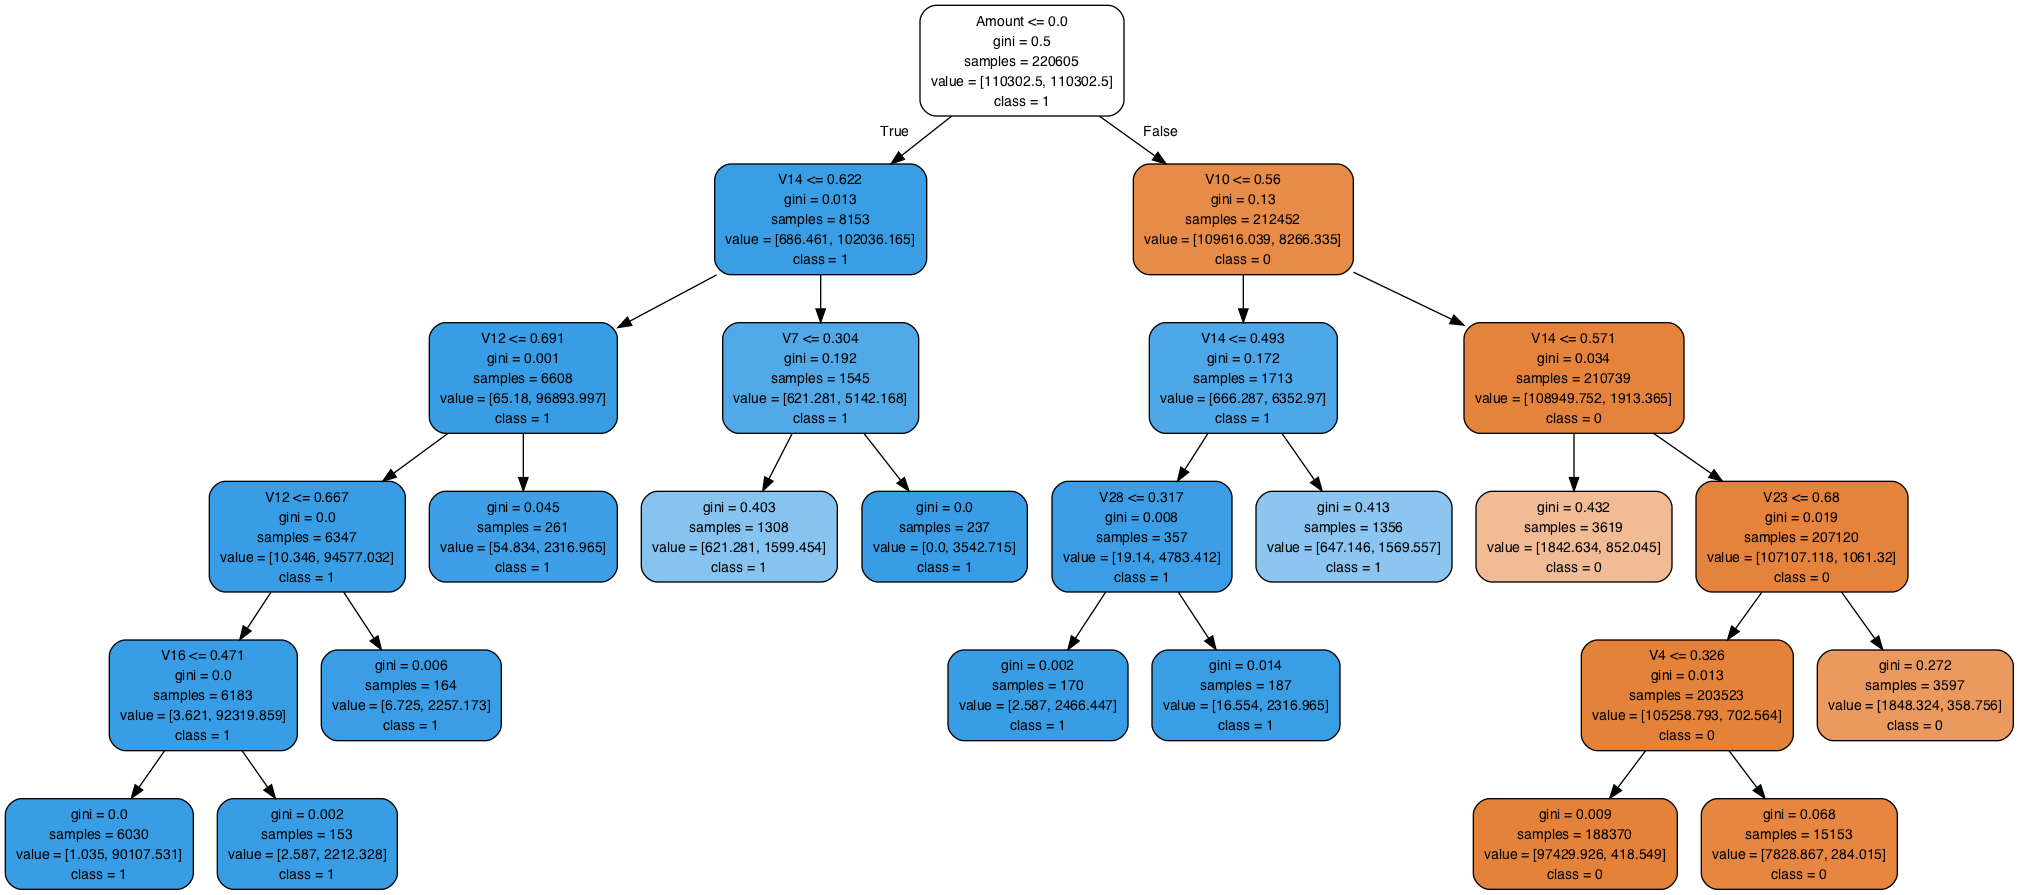

In [55]:
export_graphviz(dtree1, out_file="models/tree1.dot", feature_names=X_train.columns, class_names=["0","1"], filled=True, rounded=True)
g = pydotplus.graph_from_dot_file(path="models/tree1.dot")
Image(g.create_png()) #max_depths=11

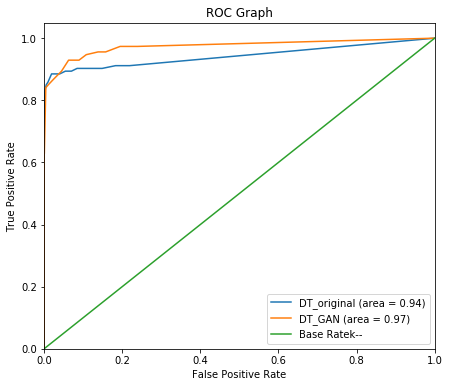

In [29]:
plt.figure(figsize=(7,6))

plt.plot(dt_fpr, dt_tpr, label='DT_original (area = %0.2f)' % dt_roc_auc)

plt.plot(dt_fpr1, dt_tpr1, label='DT_GAN (area = %0.2f)' % dt_roc_auc1)

plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

Train different DTs to verify/compare mean AUC

In [39]:
dtree = DecisionTreeClassifier(
    max_depth=5,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )

dtree1 = DecisionTreeClassifier(
    max_depth=5,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )

auc_o_list=[]
auc_gan_list=[]

for i in range(10):
    np.random.seed(i)
    dtree = dtree.fit(X_train,y_train)
    dt_roc_auc = roc_auc_score(y_test, dtree.predict_proba(X_test)[:,1])
    auc_o_list.append(dt_roc_auc)
    
    fake_data = generator(noise(7000))
    fake_data_cla=torch.clamp(fake_data,min=0.0)
    fake_data_all=pd.DataFrame(fake_data_cla.detach().numpy(), columns=X_train.columns)
    fake_data_all['Class']=1
    train_fake=pd.concat([train,  fake_data_all], axis=0)
    train_fake = sklearn.utils.shuffle(train_fake)
    X_train_fake=train_fake.drop(['Class'], axis=1)
    y_train_fake=train_fake['Class']
    
    dtree1 = dtree1.fit(X_train_fake,y_train_fake)
    auc_gan_list.append(roc_auc_score(y_test, dtree1.predict_proba(X_test)[:,1]))
    print(i)


0
1
2
3
4
5
6
7
8
9


In [49]:
print("original dataset-10 DT mean AUC:", np.mean(auc_o_list))

original dataset-10 DT mean AUC: 0.9420777544588568


In [50]:
print("GAN augmentation dataset-10 DT mean AUC:", np.mean(auc_gan_list))

GAN augmentation dataset-10 DT mean AUC: 0.9719767144687259


DT parameters choice: max_depth=5

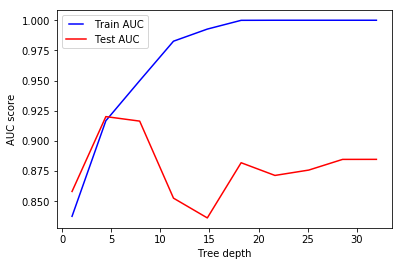

In [70]:
#from sklearn.metrics import roc_curve, auc
max_depths = np.linspace(1, 32, 10, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_auc=roc_auc_score(y_train,dt.predict_proba(X_train)[:,1])
    train_results.append(train_auc)
    test_auc=roc_auc_score(y_test,dt.predict_proba(X_test)[:,1])
    test_results.append(test_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()